/tmp/ipykernel_1199959/4200462964.py:4: DtypeWarning: Columns (10,11,12,13,14,15,16,17,19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('/data/pr/cellpainting/BBBC021/raw_data/metadata/augmented_image_metadata.csv')


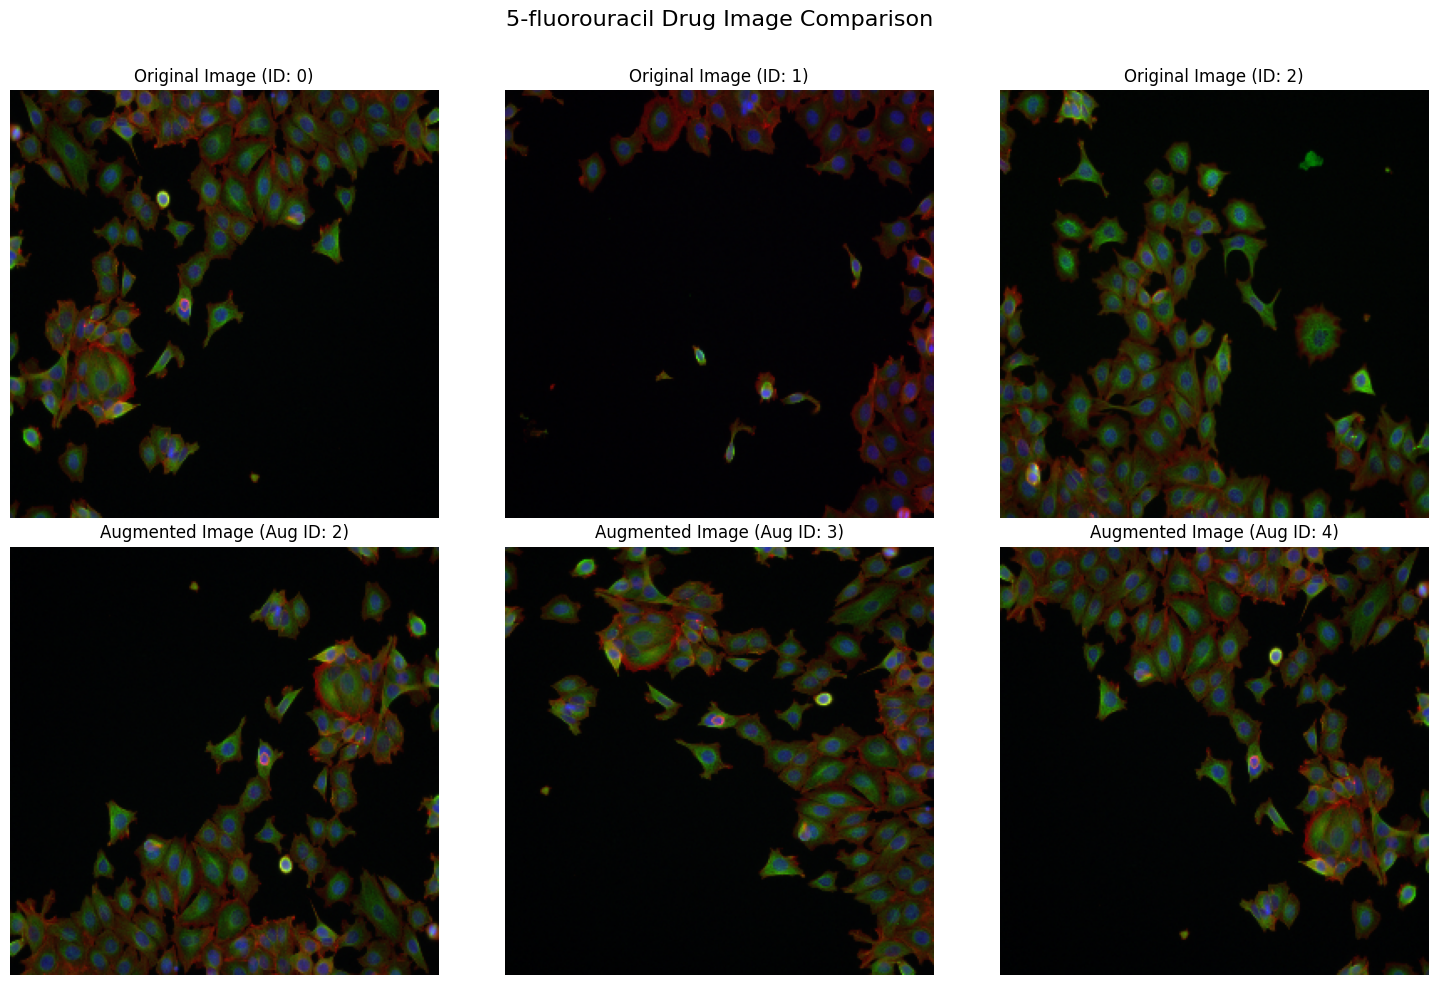

In [1]:
# 读取metadata
import pandas as pd

metadata = pd.read_csv('/data/pr/cellpainting/BBBC021/raw_data/metadata/augmented_image_metadata.csv')

# 选取5-fluorouracil药物的图片
drug_data = metadata[metadata['compound'] == '5-fluorouracil']

# 选择augmentation_id为0的三张图片
original_images = drug_data[drug_data['augmentation_id'] == 0].head(3)

# 选择augmentation_id不为0的三张图片
augmented_images = drug_data[drug_data['augmentation_id'] != 0].head(3)

# 导入必要的库
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# 创建2*3的子图
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('5-fluorouracil Drug Image Comparison', fontsize=16)

# 第一行显示原始图像
for i, (_, row) in enumerate(original_images.iterrows()):
    img_path = row['merged_image']
    img = Image.open(img_path)
    axes[0, i].imshow(np.array(img))
    axes[0, i].set_title(f"Original Image (ID: {row['original_idx']})")
    axes[0, i].axis('off')

# 第二行显示增强图像
for i, (_, row) in enumerate(augmented_images.iterrows()):
    img_path = row['merged_image']
    img = Image.open(img_path)
    axes[1, i].imshow(np.array(img))
    axes[1, i].set_title(f"Augmented Image (Aug ID: {row['augmentation_id']})")
    axes[1, i].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()